<a href="https://colab.research.google.com/github/GnosGnas/EDA_Car/blob/master/EDA_Car_Price_By_Surya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**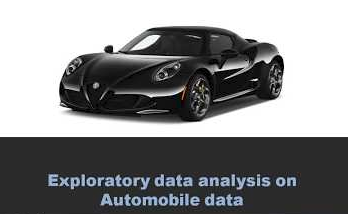**



# Introduction

Exploratory data analysis (or EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It helps us to identify which features are more important. This is particularly useful when we deal with multi dimensional data. It is an effective way to explain the incurred result to executives and non-technical stack holders. In python, there are many libraries to perform exploratory data analysis. Matplotlib, Seaborn, Plotly, Bokeh, etc. are the most popular among these.

# About this notebook

**This notebook has the following sections:**

1. Data description and Exploration

2. Renaming columns and converting certain data types

3. Numeration of categorical attributes

4. Handling of Duplicates and Null values

5. Removal of Outliers

6. Analysing the facts got from the dataset

7. Understanding the Correlation Matrix

8. Exploratory Data Analysis

9. Splitting the dataset

10. Building various Machine Learning Models

Finally we shall test out the different Models and conclude the best Model

# Section 1: Data Description and Exploration


## Importing libraries

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,RepeatedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost

First let's have a look at the dataset and know the features available

## Loading the Dataset and checking its data type and structure

The dataset was loaded from PC. To download the dataset visit https://www.kaggle.com/CooperUnion/cardataset

In [180]:
df = pd.read_csv('data.csv')

Let's have a glance at how the dataset looks like

In [181]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [182]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


As we can see, none of the columns are filled with one value so further analysis is needed to drop attributes. 

Let's look at the shape and some brief information about the dataset.

In [183]:
df.shape

(11914, 16)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## Statistical summary




Summarizing the features of the data

In [185]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Let's have a look at the number of data points in different categories

In [186]:
df['Make'].astype('category').value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Bugatti   

In [187]:
df['Vehicle Size'].astype('category').value_counts()

Compact    4764
Midsize    4373
Large      2777
Name: Vehicle Size, dtype: int64

In [188]:
df['Vehicle Style'].astype('category').value_counts()

Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: Vehicle Style, dtype: int64

In [189]:
df['Engine Fuel Type'].astype('category').value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

Checking for null values

In [190]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

We can see that Market Category has a lot of Null values. Additionally by intuition it cannot determine the Price. So we will drop it in later sections.

# Section 2: Renaming of columns and converting certain data types

## Renaming of columns

In [191]:
df = df.rename(columns = {'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'})
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Converting some attributes into string data type

Here I converted this so that it can be used in the model

In [192]:
df['Engine Fuel Type'] = df['Engine Fuel Type'].astype(str)

# Section 3: Numeration of categorical attributes

##Manipulating the data to extract numerical values

We shall be dropping Model and Market Category because intuitively they are not going to affect the data.

In [193]:
mdf = df.drop(labels=['Model','Market Category'],axis=1)

le = LabelEncoder()

mdf['Engine Fuel Type'] = df['Engine Fuel Type'].astype('|S')

mdf['Make'] = le.fit_transform(df['Make'])

mdf['Year'] = le.fit_transform(df['Year'])

mdf['Engine Fuel Type'] = le.fit_transform(df['Engine Fuel Type'])

mdf['Transmission'] = le.fit_transform(df['Transmission'])

mdf['Drive Mode'] = le.fit_transform(df['Drive Mode'])

mdf['Vehicle Size'] = le.fit_transform(df['Vehicle Size'])

mdf['Vehicle Style'] = le.fit_transform(df['Vehicle Style'])

mdf['Cylinders'] = le.fit_transform(df['Cylinders'])

mdf.count() / len(mdf)
mdf.head()

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,4,21,9,335.0,4,3,3,2.0,0,8,26,19,3916,46135
1,4,21,9,300.0,4,3,3,2.0,0,6,28,19,3916,40650
2,4,21,9,300.0,4,3,3,2.0,0,8,28,20,3916,36350
3,4,21,9,230.0,4,3,3,2.0,0,8,28,18,3916,29450
4,4,21,9,230.0,4,3,3,2.0,0,6,28,18,3916,34500


# Section 4: Handling of Duplicates and Null values

Duplicates and Null values should be removed sine it cause errors while running the model. Duplicates can shift weightage towards that particular data and Null values cannot be used in the model

## Checking for duplicates and dropping them

In [194]:
np.mean(mdf.duplicated())

0.06118851771025684

In [195]:
mdf = mdf.drop_duplicates()
mdf.shape

(11185, 14)

## Checking for null values

In [196]:
mdf.isnull().sum()

Make                 0
Year                 0
Engine Fuel Type     0
HP                  69
Cylinders            0
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

## Filling the missing data with the previous value

As the dataset is grouped by companies it would be suitable to use the values from other cars of the same company (in most cases atleast). I chose the previous value because the first five rows of the dataset doesn't have any Null value.

In [197]:
mdf = mdf.fillna(method='bfill')
mdf.shape

(11185, 14)

# Section 5: Removal of Outliers

## BoxPlots

Plotting some columns as we expect only those to have outliers

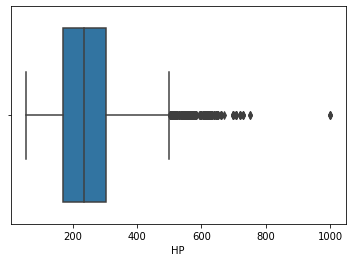

In [198]:
sns.boxplot(x=mdf['HP'])

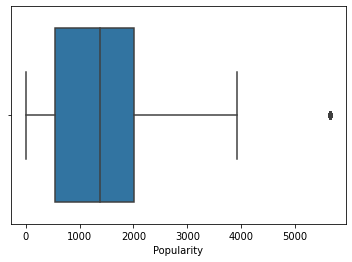

In [199]:
sns.boxplot(x=mdf['Popularity'])

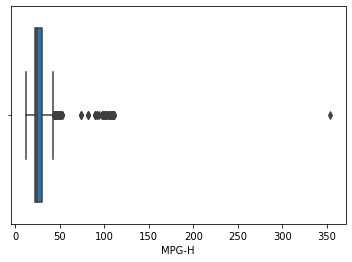

In [200]:
sns.boxplot(x=mdf['MPG-H'])

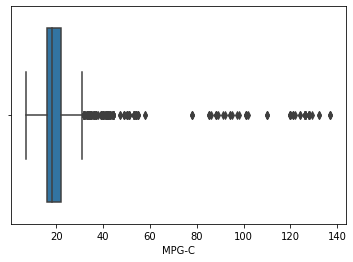

In [201]:
sns.boxplot(x=mdf['MPG-C'])

## Finding the IQR value

In [202]:
Q1 = mdf.quantile(0.25)
Q3 = mdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Make                   24.0
Year                    9.0
Engine Fuel Type        1.0
HP                    132.0
Cylinders               2.0
Transmission            0.0
Drive Mode              2.0
Number of Doors         2.0
Vehicle Size            2.0
Vehicle Style          11.0
MPG-H                   8.0
MPG-C                   6.0
Popularity           1460.0
Price               21440.0
dtype: float64


## Removing outliers

Here based on certain attributes which could cause outliers we are going to use the following condition to remove outliers.

In [203]:
mdf = mdf[~((mdf[['HP','Popularity','MPG-H','MPG-C']] < (Q1[['HP','Popularity','MPG-H','MPG-C']] - 3 * IQR[['HP','Popularity','MPG-H','MPG-C']])) |(mdf[['HP','Popularity','MPG-H','MPG-C']] > (Q3[['HP','Popularity','MPG-H','MPG-C']] + 3 * IQR[['HP','Popularity','MPG-H','MPG-C']]))).any(axis=1)]
#check 1.5 or 3
mdf.shape

(10979, 14)

# Section 6: Analysing the facts got from the dataset

Let's have a look at different findings for each car companies.

### Number of Cars in each company

In [204]:
df['Make'].astype('category').value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Bugatti   

Chevrolet, Ford, Volkswagen, Toyota and Dodge are the five most represented cars in the dataset.

### List showing highest price of car of each company 

In [205]:
car_companies = df.groupby('Make')
print(car_companies['Price'].max().sort_values())

Make
Scion              31090
Suzuki             31749
FIAT               31800
Oldsmobile         36795
Pontiac            37610
Mitsubishi         38995
Subaru             39995
HUMMER             43130
Mazda              44015
Plymouth           44625
Honda              47070
Chrysler           49470
Buick              49625
Saab               51330
Genesis            54550
Kia                61900
Volvo              65700
Alfa Romeo         68400
Hyundai            68750
GMC                71665
Lincoln            76650
Toyota             84325
Infiniti           88850
Chevrolet          92395
Lotus              93225
Volkswagen        101300
Cadillac          104215
Dodge             120395
Tesla             134500
BMW               141200
Nissan            149990
Ford              149995
Acura             156000
Maserati          182009
Land Rover        199495
Audi              199900
Spyker            219990
McLaren           280225
Aston Martin      320695
Bentley           36

Most expensive cars in the dataset are made by Bugatti, Lamborgini and Maybach.



### Average price of cars in the dataset produced by each company

In [206]:
print(car_companies['Price'].mean().sort_values())

Make
Plymouth         3.122902e+03
Oldsmobile       1.154254e+04
Suzuki           1.790721e+04
Pontiac          1.932155e+04
Scion            1.993250e+04
Mazda            2.003938e+04
Mitsubishi       2.124054e+04
Dodge            2.239006e+04
FIAT             2.267024e+04
Hyundai          2.459704e+04
Subaru           2.482750e+04
Kia              2.531017e+04
Honda            2.667434e+04
Chrysler         2.672296e+04
Ford             2.739927e+04
Saab             2.741350e+04
Volkswagen       2.810238e+04
Buick            2.820661e+04
Chevrolet        2.835039e+04
Volvo            2.854116e+04
Nissan           2.858343e+04
Toyota           2.903002e+04
GMC              3.049330e+04
Acura            3.488759e+04
HUMMER           3.646441e+04
Infiniti         4.239421e+04
Lincoln          4.283983e+04
Genesis          4.661667e+04
Lexus            4.754907e+04
Audi             5.345211e+04
Cadillac         5.623132e+04
BMW              6.154676e+04
Alfa Romeo       6.160000e+04
Land 

Bugatti, Maybach and Rolls-Royce sell their cars at the highest average prices.

### Popularity ratings of cars based on the company

In [207]:
print(car_companies['Popularity'].mean().sort_values())

Make
Spyker              2
Genesis            21
Oldsmobile         26
Lincoln            61
Maybach            67
Rolls-Royce        86
Scion             105
Alfa Romeo        113
HUMMER            130
Buick             155
Infiniti          190
Acura             204
Pontiac           210
Maserati          238
Land Rover        258
Aston Martin      259
Saab              376
McLaren           416
Mitsubishi        436
Lexus             454
Suzuki            481
Bentley           520
Plymouth          535
GMC               549
Mazda             586
Lotus             613
Mercedes-Benz     617
Subaru            640
FIAT              819
Bugatti           820
Volvo             870
Volkswagen        873
Chrysler         1013
Lamborghini      1158
Chevrolet        1385
Tesla            1391
Hyundai          1439
Cadillac         1624
Porsche          1715
Kia              1720
Dodge            1851
Nissan           2009
Toyota           2031
Honda            2202
Ferrari          2774
Audi 

Greatly popular cars are produced by Ford, BMW and Audi.

# Section 7: Understanding the Correlation Matrix

## Pairwise Graphs

For visual purposes let's first plot pairwise graphs to see for any obivous correlations

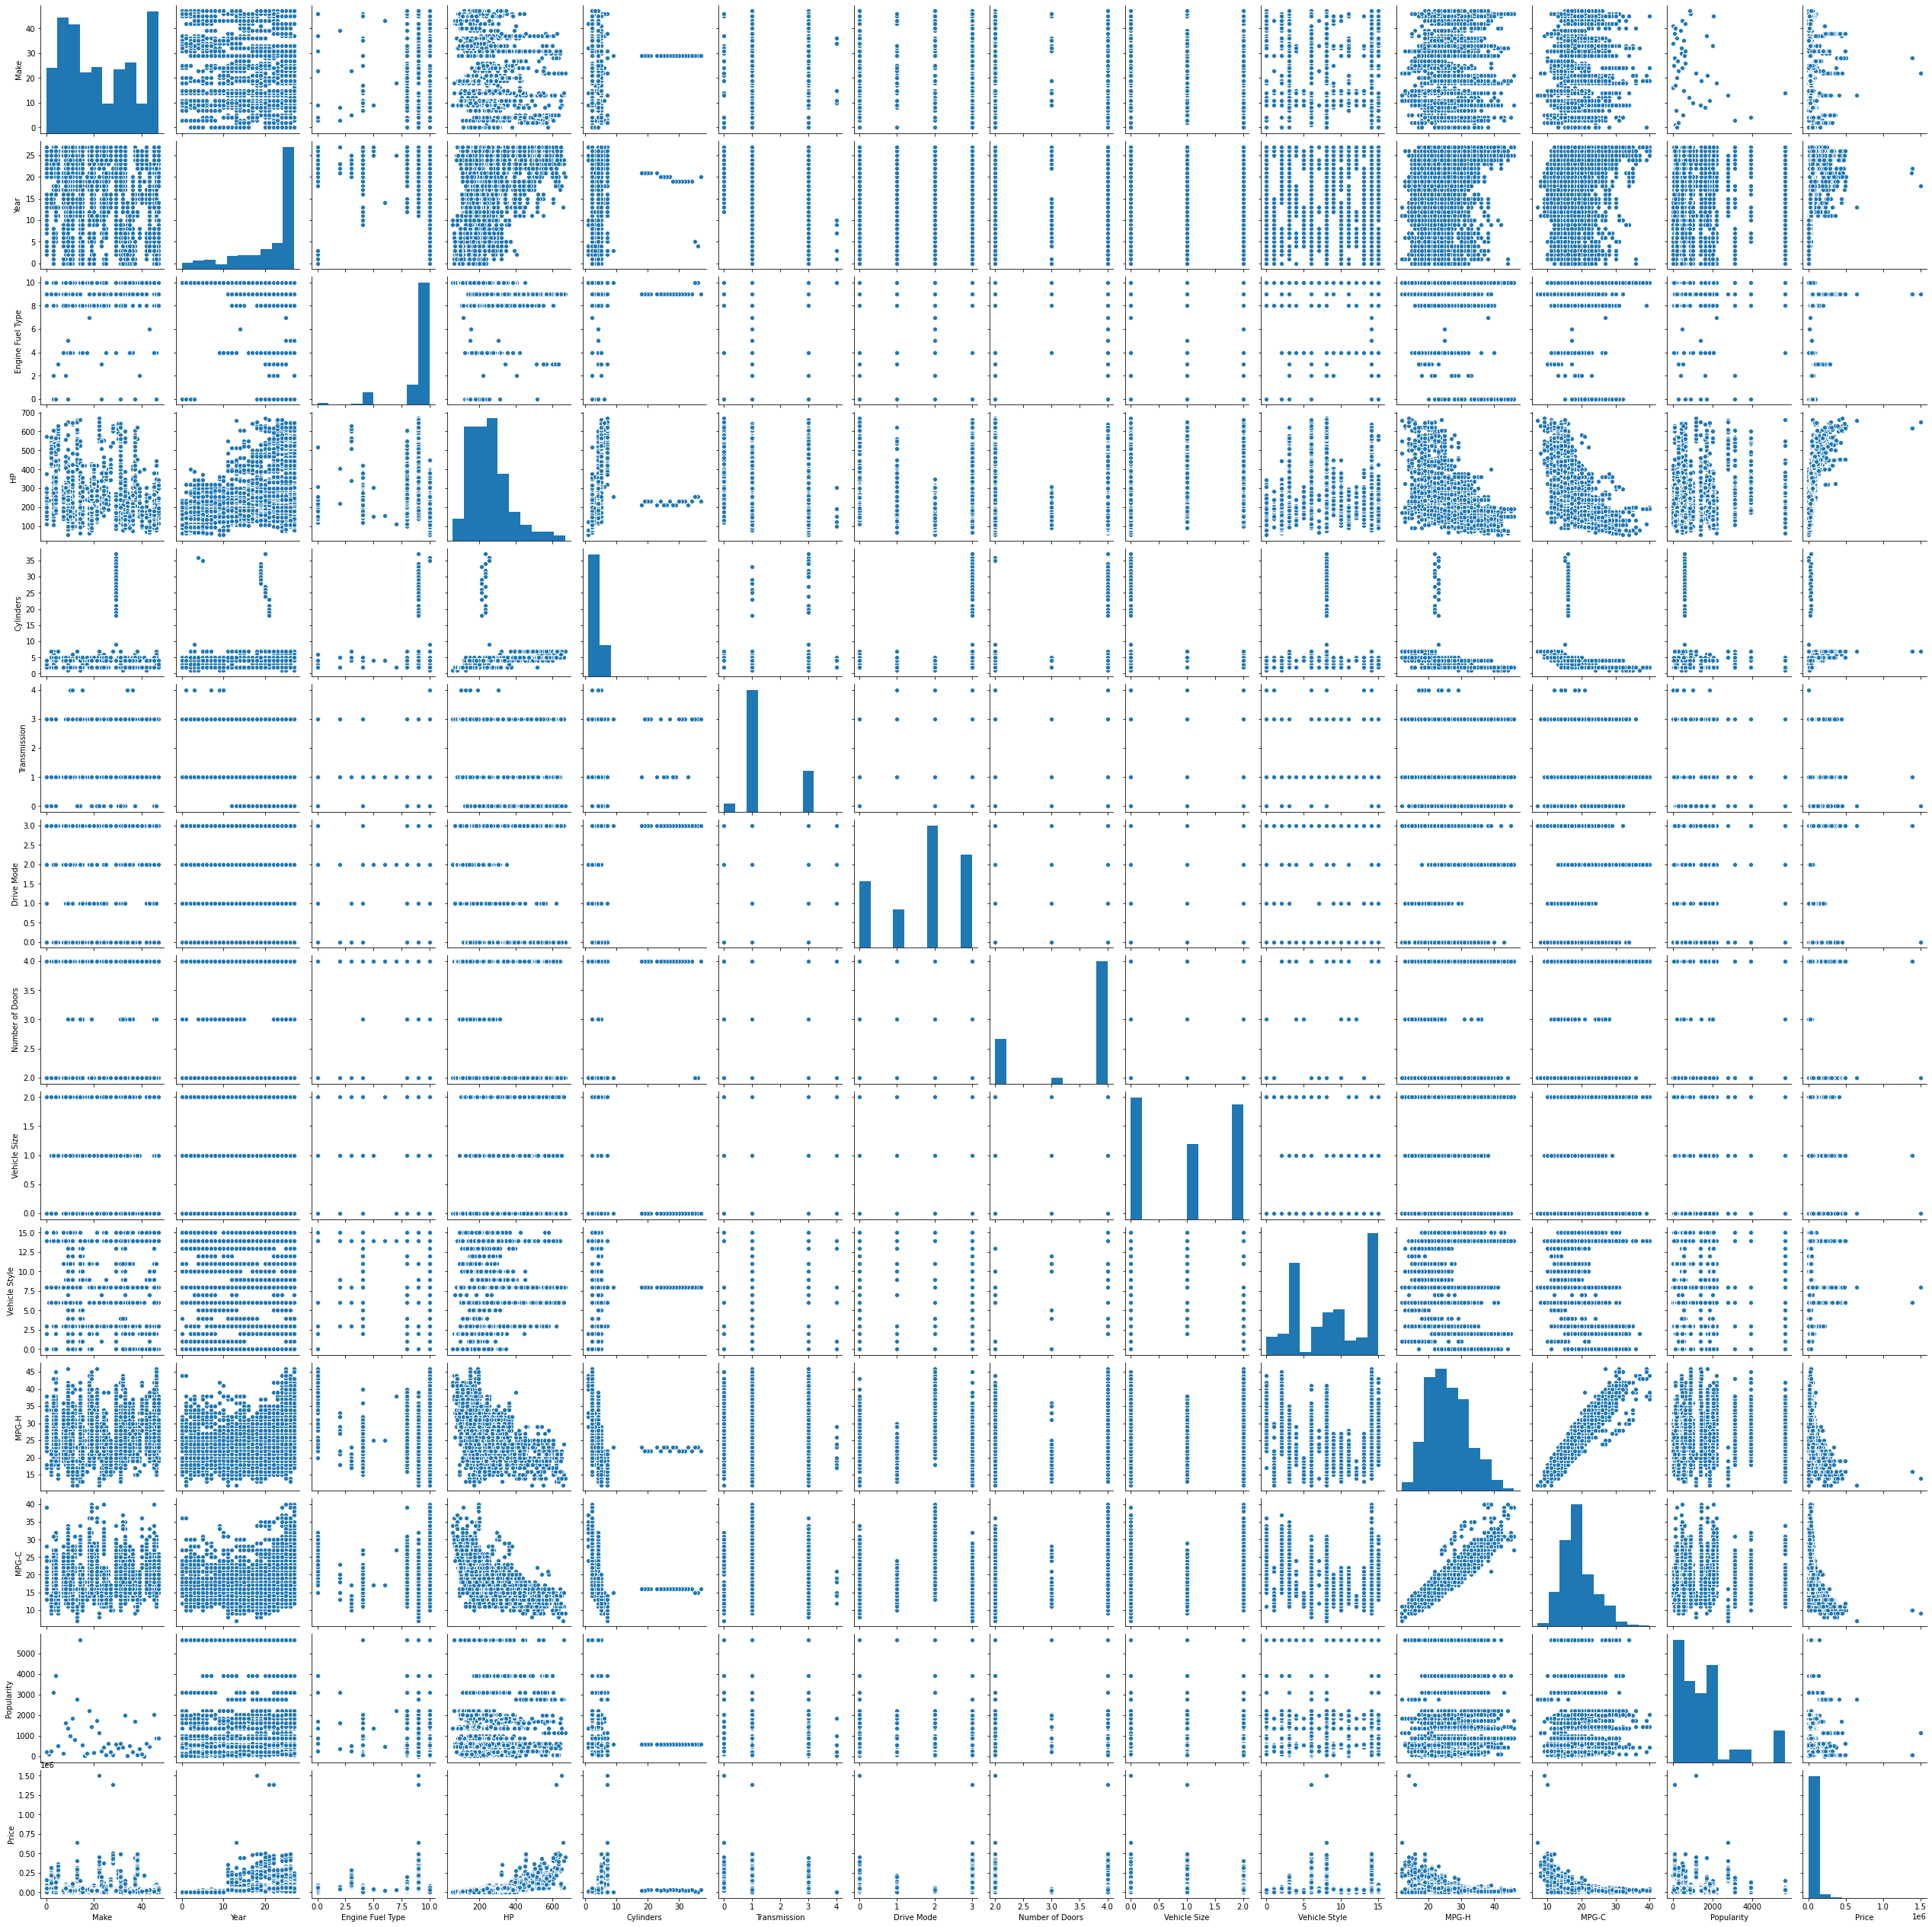

In [208]:
sns.pairplot(mdf)

## Correlation matrix

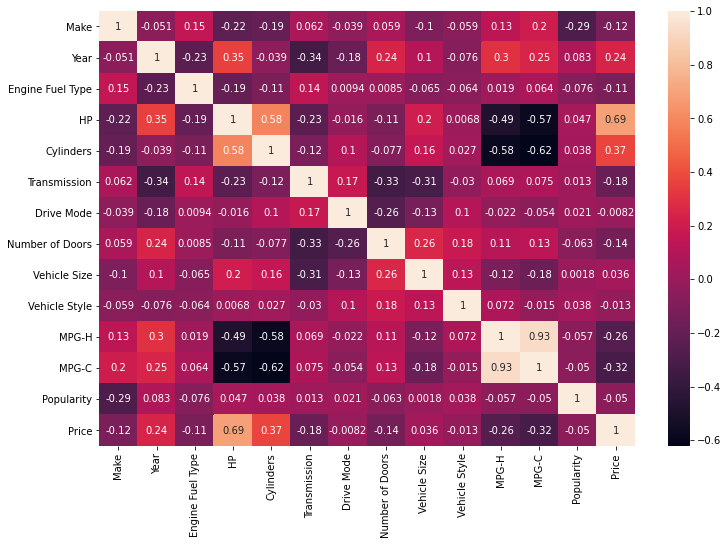

In [209]:
corr = mdf.corr()
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot = True)

From the heatmap, we can see the following to be well correlated:
1. MPG-H and MPG-C
2. MPGs and HP
3. MPGs and Cylinders
4. Cylinders and HP

Another important relation is the correlation with Price which can be visualised further in the next section. Price is heavily dependent on HP and Cylinders.

In [210]:
mdf.head()

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,4,21,9,335.0,4,3,3,2.0,0,8,26,19,3916,46135
1,4,21,9,300.0,4,3,3,2.0,0,6,28,19,3916,40650
2,4,21,9,300.0,4,3,3,2.0,0,8,28,20,3916,36350
3,4,21,9,230.0,4,3,3,2.0,0,8,28,18,3916,29450
4,4,21,9,230.0,4,3,3,2.0,0,6,28,18,3916,34500


# Section 8: Exploratory Data Analysis

## Distribution Plots for certain attributes

Distplots stand for distribution plots and give a view on the distribution of different ranges of an attribute. It is basically a histogram with an expected line for distribution. The objective of a predictive model is to reduce the residual distance between the line and the actual value

In [211]:
mdf.head()

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,4,21,9,335.0,4,3,3,2.0,0,8,26,19,3916,46135
1,4,21,9,300.0,4,3,3,2.0,0,6,28,19,3916,40650
2,4,21,9,300.0,4,3,3,2.0,0,8,28,20,3916,36350
3,4,21,9,230.0,4,3,3,2.0,0,8,28,18,3916,29450
4,4,21,9,230.0,4,3,3,2.0,0,6,28,18,3916,34500


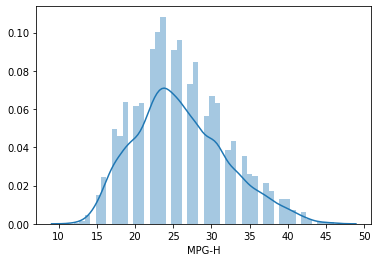

In [212]:
sns.distplot(mdf['MPG-H'])

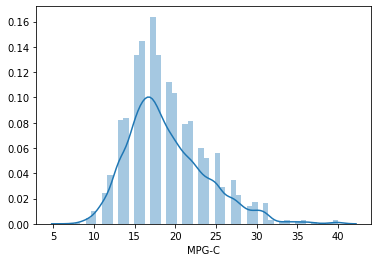

In [213]:
sns.distplot(mdf['MPG-C'])

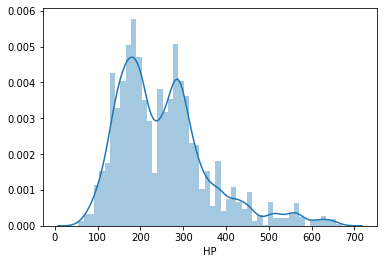

In [214]:
sns.distplot(mdf['HP']) ##do for all with max linear relation with price

## Scatter Plots

Here we shall plot each attribute against Price to further visualise correlation with the attributes

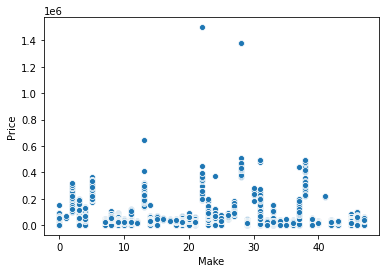

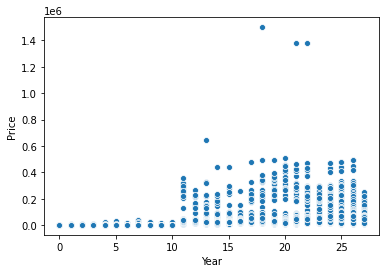

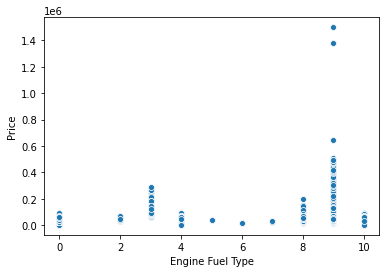

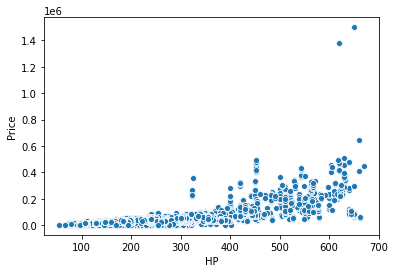

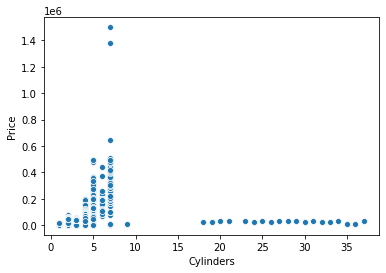

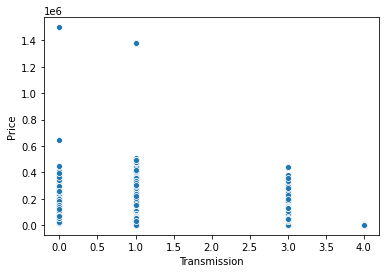

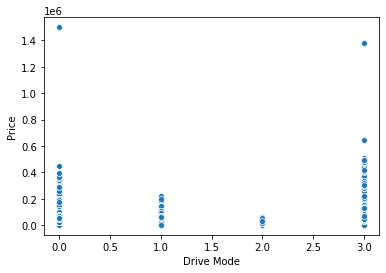

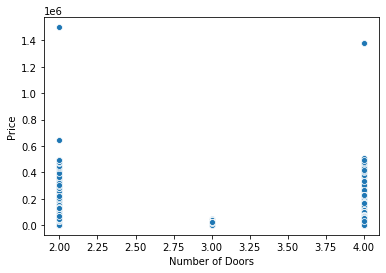

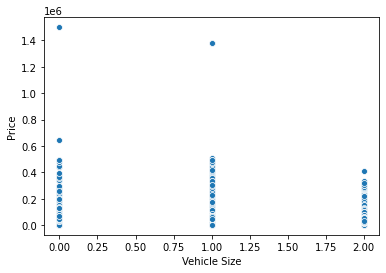

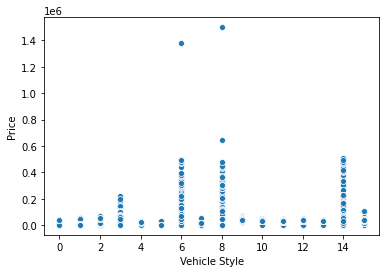

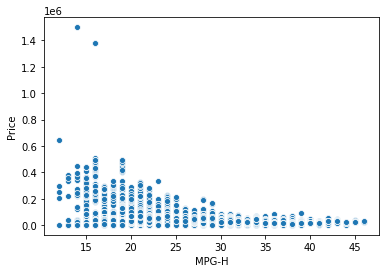

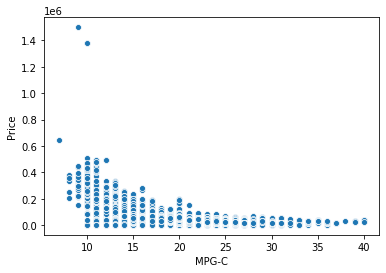

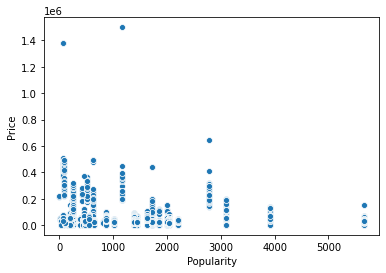

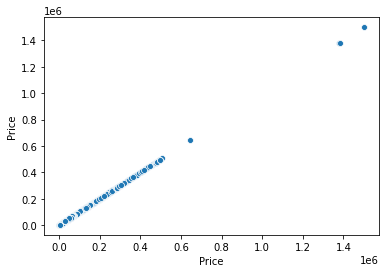

In [215]:
for i, col in enumerate (mdf.columns):
    plt.figure(i)
    sns.scatterplot(x=mdf[col],y=mdf['Price'])

## Variable Inflation Factors

Variable Inflation Factor or VIF value identifies multicollinear relations of the features. If high then it means the value greatly depends on other features. We can use it to understand the effects of removing a column on Price.

Let's first define a function to calculate it.

In [216]:
#VIF - Variable Inflation Factors

def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [217]:
calc_vif(mdf)

,Columns,VIF
0,Make,4.083280
1,Year,20.654709
2,Engine Fuel Type,18.653463
3,HP,22.310752
4,Cylinders,9.415380
5,Transmission,4.453971
6,Drive Mode,4.003748
7,Number of Doors,20.308901
8,Vehicle Size,2.836333
9,Vehicle Style,4.769095


We can see that MPGs have a high value so we can eliminate one of them. Since Price is more correlated to MPG-C we shall remove MPG-H.

In [218]:
temp_df = mdf.drop(labels=['MPG-H'],axis=1)
calc_vif(temp_df)

,Columns,VIF
0,Make,4.041889
1,Year,19.923799
2,Engine Fuel Type,18.629981
3,HP,22.218240
4,Cylinders,9.411447
5,Transmission,4.378085
6,Drive Mode,3.957122
7,Number of Doors,20.243352
8,Vehicle Size,2.787934
9,Vehicle Style,4.428652


So the VIF value of MPG-C has greatly reduced. This might not necessarily be a good thing as the error increases with this dataset but with more data the linearity would increase and the error will also decrease. So we shall drop the attribute  MPG-H.

In [219]:
mdf = mdf.drop(labels = 'MPG-H',axis = 1)

# Section 9: Splitting the dataset

## Splitting the dataset into training set, cross validation set and test set



In [220]:
X = mdf.drop(labels=['Price'],axis=1).values
y = mdf[['Price']].values

Standardisation of data hasn't been done because it resulted in higher error.

In [221]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.2,random_state = 1)

train_X, val_X, train_y, val_y = train_test_split(train_X,train_y,test_size = 0.2,random_state = 1)

We are going to use validation set to determine the right hyperparameter in each case

# Section 10: Building various Machine Learning Models

Now we shall test each of our models and identify the tweaks required to make each of them more closer to actual values

### Linear Model

Let's start with the simple Linear Model

In [222]:
#linear model

L_model = LinearRegression()
L_model.fit(train_X,train_y)
L_pred = L_model.predict(val_X)

print("Linear Model without regression:\nMean Absolute Error:",mean_absolute_error(val_y,L_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,L_pred)),"\nR2 Score:",r2_score(val_y,L_pred))

Linear Model without regression:
Mean Absolute Error: 16764.593035619797 
Root Mean Squared Error: 27996.324744383743 
R2 Score: 0.5442067713714762


Let's also try Linear Model with regularisation

In [223]:
#linear model with regularisation
#Here min_mae is used to identify the right hyperparameter (hp).
#In Ridge Model we need to determine the hyperparameter 'alpha'.

min_mae = 100000  #a very large value is randomly given to it
R_hp = 0

for i in range(1,2000):
    R_model = Ridge(alpha = i,random_state = 1)
    R_model.fit(train_X,train_y)
    R_pred = R_model.predict(val_X)
    R_mae = mean_absolute_error(val_y,R_pred)
    
    if R_mae < min_mae:
        min_mae = R_mae
        R_hp = i

R_model = Ridge(alpha = R_hp,random_state = 1)
R_model.fit(train_X,train_y)
R_pred = R_model.predict(val_X)

print("Linear Model with regularisation constant =",R_hp,":\nMean Absolute Error:",mean_absolute_error(val_y,R_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,R_pred)),"\nR2 Score:",r2_score(val_y,R_pred))

Linear Model with regularisation constant = 1319 :
Mean Absolute Error: 16688.01176926897 
Root Mean Squared Error: 27981.98391388798 
R2 Score: 0.5446736025985672


We note that there is very little role played by regularisation.

### SVM based Regressor

SVM has multiple parameters which can be tweeked. So first we shall identify which kernel works the best.

In [224]:
#Linear kernel
SVR_model = SVR(kernel = 'linear')
SVR_model.fit(train_X,train_y)
SVR_pred = SVR_model.predict(val_X)

print("SVM Model with linear kernel:\nMean Absolute Error:",mean_absolute_error(val_y,SVR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,SVR_pred)),"\nR2 Score:",r2_score(val_y,SVR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model with linear kernel:
Mean Absolute Error: 11974.919758311518 
Root Mean Squared Error: 30397.342631903546 
R2 Score: 0.4626749825014965


In [225]:
# Polynomial kernel
SVR_model = SVR(kernel = 'poly')
SVR_model.fit(train_X,train_y)
SVR_pred = SVR_model.predict(val_X)

print("SVM Model with linear kernel:\nMean Absolute Error:",mean_absolute_error(val_y,SVR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,SVR_pred)),"\nR2 Score:",r2_score(val_y,SVR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model with linear kernel:
Mean Absolute Error: 20247.002167966693 
Root Mean Squared Error: 42078.40171433203 
R2 Score: -0.029637365697581686


In [226]:
#RBF kernel
SVR_model = SVR(kernel = 'rbf')
SVR_model.fit(train_X,train_y)
SVR_pred = SVR_model.predict(val_X)

print("SVM Model with linear kernel:\nMean Absolute Error:",mean_absolute_error(val_y,SVR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,SVR_pred)),"\nR2 Score:",r2_score(val_y,SVR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model with linear kernel:
Mean Absolute Error: 20253.220627752893 
Root Mean Squared Error: 42071.194705427806 
R2 Score: -0.029284692122750755


In [227]:
#Sigmoid Kernel
SVR_model = SVR(kernel = 'sigmoid')
SVR_model.fit(train_X,train_y)
SVR_pred = SVR_model.predict(val_X)

print("SVM Model with linear kernel:\nMean Absolute Error:",mean_absolute_error(val_y,SVR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,SVR_pred)),"\nR2 Score:",r2_score(val_y,SVR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model with linear kernel:
Mean Absolute Error: 20279.04548611856 
Root Mean Squared Error: 42085.63276529369 
R2 Score: -0.02999127647801947


From this brief analysis we can easily say that the SVR Model works best with linear kernel. Let's see whether there is a significant decrease in error when we apply regularisation.

In [228]:
SVR_model = SVR(kernel = 'linear',C=15)
SVR_model.fit(train_X,train_y)
SVR_pred = SVR_model.predict(val_X)
SVR_mae = mean_absolute_error(val_y,SVR_pred)

print("SVM Model with linear kernel:\nMean Absolute Error:",mean_absolute_error(val_y,SVR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,SVR_pred)),"\nR2 Score:",r2_score(val_y,SVR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model with linear kernel:
Mean Absolute Error: 11873.84939801534 
Root Mean Squared Error: 30341.923955859584 
R2 Score: 0.4646324362708608


The decrease is not very significant enough so we shall not try to tweak it further because the process is very time consuming.

### Decision Tree Regressor

In [230]:
# Decision Tree Regressor
# Here our objective is to find the right extent of the branching

min_mae = 100000
DTR_hp = 0

for i in range(1,100):
    DTR_model = DecisionTreeRegressor(max_depth = i,random_state = 1)
    DTR_model.fit(train_X,train_y)
    DTR_pred = DTR_model.predict(val_X)
    DTR_mae = mean_absolute_error(val_y,DTR_pred)

    if DTR_mae < min_mae:
        min_mae = DTR_mae
        DTR_hp = i

DTR_model = DecisionTreeRegressor(max_depth = DTR_hp,random_state = 1)
DTR_model.fit(train_X,train_y)
DTR_pred = DTR_model.predict(val_X)

print("Decision Tree Regressor with maximum depth of",DTR_hp,":\nMean Absolute Error:",mean_absolute_error(val_y,DTR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,DTR_pred)),"\nR2 Score:",r2_score(val_y,DTR_pred))

Decision Tree Regressor with maximum depth of 20 :
Mean Absolute Error: 3483.3186810832017 
Root Mean Squared Error: 9323.618458146784 
R2 Score: 0.9494484111773294


### Random Forest Regressor

Here we shall directly use the maximum depth from Decision Tree model

In [231]:
#Random Forest Regressor
#Our objective is to find the ideal number of estimators
#DTR_hp has the value of max_depth

min_mae = 100000
RFR_hp = 0

for i in range(1,100):
    RFR_model = RandomForestRegressor(max_depth = DTR_hp, n_estimators = i,random_state = 1)
    RFR_model.fit(train_X,train_y)
    RFR_pred= RFR_model.predict(val_X)
    RFR_mae = mean_absolute_error(val_y,RFR_pred)

    if RFR_mae < min_mae:
        min_mae = RFR_mae
        RFR_hp = i

RFR_model = RandomForestRegressor(max_depth = DTR_hp, n_estimators = RFR_hp,random_state = 1)
RFR_model.fit(train_X,train_y)
RFR_pred= RFR_model.predict(val_X)

print("\nRandom Forest Regressor with maximum depth of",DTR_hp,"and",RFR_hp,"trees:\nMean Absolute Error:",mean_absolute_error(val_y,RFR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,RFR_pred)),"\nR2 Score:",r2_score(val_y,RFR_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to


Random Forest Regressor with maximum depth of 20 and 41 trees:
Mean Absolute Error: 3261.4458498188533 
Root Mean Squared Error: 6322.197655050077 
R2 Score: 0.9767564765552197


### Extra Trees Regression Model

There are two main hyperparameters which are to be controlled in Extra Trees Regression Model - n_estimators and max_depth. We shall use the same value of depth from DTR Model.

In [232]:
min_mae = 100000
ETR_hp = 0

for i in range(10,50):
    ETR_model = ExtraTreesRegressor(max_depth = DTR_hp, n_estimators = i, random_state = 1).fit(train_X,train_y)
    ETR_pred = ETR_model.predict(val_X)
    ETR_mae = mean_absolute_error(val_y,ETR_pred)

    if ETR_mae < min_mae:
        min_mae = ETR_mae
        ETR_hp = i

ETR_model = ExtraTreesRegressor(max_depth = DTR_hp, n_estimators = 35,random_state = 1)
ETR_model.fit(train_X,train_y)
ETR_pred = DTR_model.predict(val_X)

print("Extras Tree Regressor with",DTR_hp,"depth and",ETR_hp," estimators:\nMean Absolute Error:",mean_absolute_error(val_y,ETR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,ETR_pred)),"\nR2 Score:",r2_score(val_y,ETR_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vect

Extras Tree Regressor with 20 depth and 38  estimators:
Mean Absolute Error: 3483.3186810832017 
Root Mean Squared Error: 9323.618458146784 
R2 Score: 0.9494484111773294


### XGBoost

There are a lot of parameters to be controlled here so we shall use another function to get the best parameters for XGBRegressor().

In [233]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

regressor = xgboost.XGBRegressor()
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,'max_depth':max_depth,'learning_rate':learning_rate,'min_child_weight':min_child_weight,'booster':booster,'base_score':base_score}


In [234]:
random_cv = RandomizedSearchCV(estimator=regressor,param_distributions=hyperparameter_grid,cv=5, n_iter=50,scoring = 'neg_mean_absolute_error',n_jobs = 4,verbose = 5, return_train_score = True,random_state=42)


In [235]:
random_cv.fit(train_X,train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   21.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 11.8min finished


[05:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [236]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

The values displayed above are to be used as parameters for XGBRegressor()

In [237]:
XGB_model = xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Here we have evaluated the model with training and validation set. For the next section we need to again develop the model.

In [238]:
XGB_model.fit(train_X,train_y)
XGB_pred = XGB_model.predict(val_X)

print("XGB Regressor:\nMean Absolute Error:",mean_absolute_error(val_y,XGB_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(val_y,XGB_pred)),"\nR2 Score:",r2_score(val_y,XGB_pred))

[05:07:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Regressor:
Mean Absolute Error: 2872.3863060027957 
Root Mean Squared Error: 5603.676678175162 
R2 Score: 0.9817395295319834


# Evaluation and Identification of the best Model

We have identified the best versions of each model till now.

Now let's add the validation set to the training set and test each model against each other

In [239]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.2,random_state = 1)

**Linear Model**

In [240]:
L_model.fit(train_X,train_y)
L_pred = L_model.predict(test_X)
print("Linear Model without regression:\nMean Absolute Error:",mean_absolute_error(test_y,L_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(test_y,L_pred)),"\nR2 Score:",r2_score(test_y,L_pred))

Linear Model without regression:
Mean Absolute Error: 19108.48887970027 
Root Mean Squared Error: 56213.404922438174 
R2 Score: 0.3806574343632624


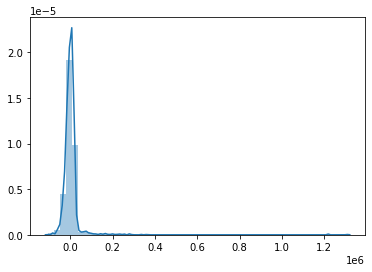

In [241]:
sns.distplot((test_y - L_pred), bins=50)

**Linear Model with Regression**

In [242]:
R_model.fit(train_X,train_y)
R_pred = R_model.predict(test_X)
print("Linear Model with regression:\nMean Absolute Error:",mean_absolute_error(test_y,R_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(test_y,R_pred)),"\nR2 Score:",r2_score(test_y,R_pred))

Linear Model with regression:
Mean Absolute Error: 19117.209827476778 
Root Mean Squared Error: 56294.55617244517 
R2 Score: 0.37886794297298987


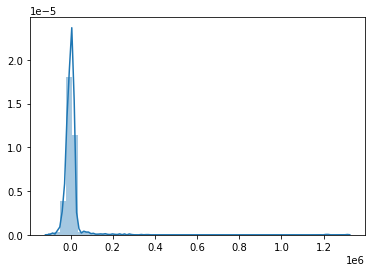

In [243]:
sns.distplot((test_y - R_pred), bins=50)

**SVM Based Regressor**

In [244]:
SVR_model.fit(train_X,train_y)
SVR_pred = SVR_model.predict(test_X)
print("SVM Based Regressor:\nMean Absolute Error:",mean_absolute_error(test_y,SVR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(test_y,SVR_pred)),"\nR2 Score:",r2_score(test_y,SVR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Based Regressor:
Mean Absolute Error: 15967.944295752182 
Root Mean Squared Error: 62147.38310858259 
R2 Score: 0.2429983303541482


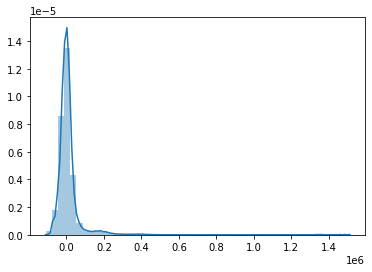

In [245]:
sns.distplot((test_y - SVR_pred), bins=50)

**Decision Tree Regressor**

In [246]:
DTR_model.fit(train_X,train_y)
DTR_pred = DTR_model.predict(test_X)
print("Decision Tree Regressor:\nMean Absolute Error:",mean_absolute_error(test_y,DTR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(test_y,DTR_pred)),"\nR2 Score:",r2_score(test_y,DTR_pred))

Decision Tree Regressor:
Mean Absolute Error: 5189.382291786926 
Root Mean Squared Error: 38015.73291402502 
R2 Score: 0.7167448070454161


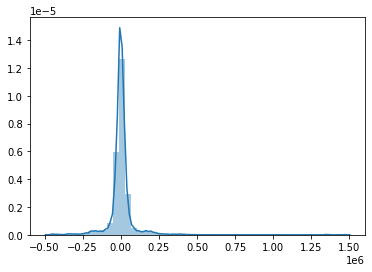

In [247]:
sns.distplot((test_y - DTR_pred), bins=50)

**Random Forest Regressor**

In [248]:
RFR_model.fit(train_X,train_y)
RFR_pred= RFR_model.predict(test_X)
print("Random Forest Regressor:\nMean Absolute Error:",mean_absolute_error(test_y,RFR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(test_y,RFR_pred)),"\nR2 Score:",r2_score(test_y,RFR_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Random Forest Regressor:
Mean Absolute Error: 4680.024361170997 
Root Mean Squared Error: 37467.945902696 
R2 Score: 0.7248491149651847


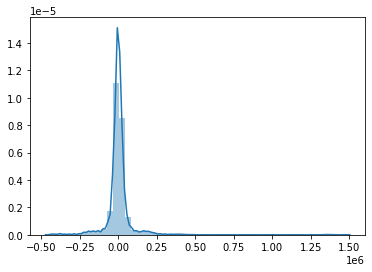

In [249]:
sns.distplot((test_y - RFR_pred), bins=50)

**Extra Trees Regressor**

In [250]:
ETR_model.fit(train_X,train_y)
ETR_pred = ETR_model.predict(test_X)
print("Extra Trees Regressor:\nMean Absolute Error:",mean_absolute_error(test_y,ETR_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(test_y,ETR_pred)),"\nR2 Score:",r2_score(test_y,ETR_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Extra Trees Regressor:
Mean Absolute Error: 4564.940911140376 
Root Mean Squared Error: 37969.04619377896 
R2 Score: 0.7174401052629749


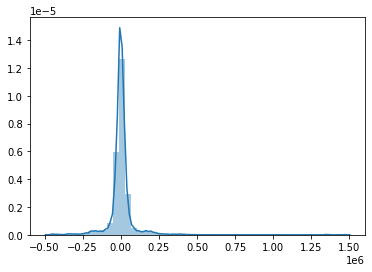

In [251]:
sns.distplot((test_y - DTR_pred), bins=50)

**XGB Regressor**

For this we need to again use RandomizedSearchCV to find the ideal parameters as we are using a different training set.

In [252]:
random_cv.fit(train_X,train_y)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   26.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 14.7min finished


[05:32:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [255]:
XGB2_model = xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
XGB2_model.fit(train_X,train_y)
XGB2_pred = XGB2_model.predict(test_X)
print("XGB Regressor:\nMean Absolute Error:",mean_absolute_error(test_y,XGB2_pred),"\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(test_y,XGB2_pred)),"\nR2 Score:",r2_score(test_y,XGB2_pred))

[05:36:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Regressor:
Mean Absolute Error: 4316.283394527349 
Root Mean Squared Error: 37195.1940434482 
R2 Score: 0.7288405136961342


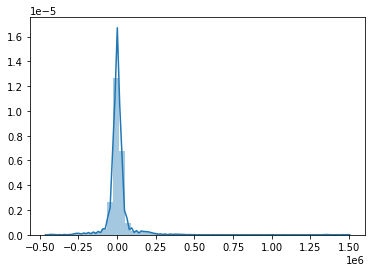

In [256]:
sns.distplot((test_y - XGB_pred), bins=50)

# Conclusion

XGBRegressor or Extreme Gradient Boosting Regressor works the best with the given dataset. It is closely followed by Extra Trees Regressor and Random Forest Regressor. All the three use multiple Decision Trees so it works better than a single Decision Tree as expected.
SVR, though better than Linear Model, works the slowest while testing and naturally Linear Model worked the fastest sheerly due to its simplicity. XGBRegressor is very accurate and also sufficiently fast as can be noted when it is run.

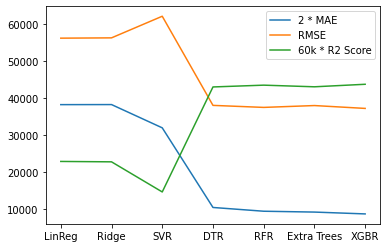

In [278]:
columns = ['LinReg','Ridge','SVR','DTR','RFR','Extra Trees','XGBR']

mae_all = np.array([mean_absolute_error(test_y,L_pred),mean_absolute_error(test_y,R_pred),mean_absolute_error(test_y,SVR_pred),mean_absolute_error(test_y,DTR_pred),mean_absolute_error(test_y,RFR_pred),mean_absolute_error(test_y,ETR_pred),mean_absolute_error(test_y,XGB2_pred)])
plt.plot(columns,2*mae_all,label = '2 * MAE')
rmse_all = np.array([np.sqrt(mean_squared_error(test_y,L_pred)),np.sqrt(mean_squared_error(test_y,R_pred)),np.sqrt(mean_squared_error(test_y,SVR_pred)),np.sqrt(mean_squared_error(test_y,DTR_pred)),np.sqrt(mean_squared_error(test_y,RFR_pred)),np.sqrt(mean_squared_error(test_y,ETR_pred)),np.sqrt(mean_squared_error(test_y,XGB2_pred))])
plt.plot(columns,rmse_all,label = 'RMSE')
r2score_all = np.array([r2_score(test_y,L_pred),r2_score(test_y,R_pred),r2_score(test_y,SVR_pred),r2_score(test_y,DTR_pred),r2_score(test_y,RFR_pred),r2_score(test_y,ETR_pred),r2_score(test_y,XGB2_pred)])
plt.plot(columns,60000*r2score_all,label = '60k * R2 Score')
plt.legend()
plt.show()

I have scaled some metrics to make the visualisation more clear. As we can see the four models based on Decision Trees have worked better than others in all the metrics with XGBR being the best in all three metrics. Additionally let's look at a comparison between the four models based on Decision Trees.

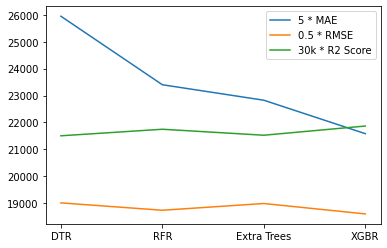

In [285]:
cols = ['DTR','RFR','Extra Trees','XGBR']

mae_DT = np.array([mean_absolute_error(test_y,DTR_pred),mean_absolute_error(test_y,RFR_pred),mean_absolute_error(test_y,ETR_pred),mean_absolute_error(test_y,XGB2_pred)])
plt.plot(cols,5*mae_DT,label = '5 * MAE')
rmse_DT = np.array([np.sqrt(mean_squared_error(test_y,DTR_pred)),np.sqrt(mean_squared_error(test_y,RFR_pred)),np.sqrt(mean_squared_error(test_y,ETR_pred)),np.sqrt(mean_squared_error(test_y,XGB2_pred))])
plt.plot(cols,0.5*rmse_DT,label = '0.5 * RMSE')
r2score_DT = np.array([r2_score(test_y,DTR_pred),r2_score(test_y,RFR_pred),r2_score(test_y,ETR_pred),r2_score(test_y,XGB2_pred)])
plt.plot(cols,30000*r2score_DT,label = '30k * R2 Score')
plt.legend()
plt.show()

MAE seems to be the best metric for comparison and as we can see XGBoosting works far better than others.

#End Of Project EDA